## 1. Introduction

### 1.1 Background

My organization decided to venture into mobile phone business as a way of extending our product portfolio as part of our expansion plan. We worked on all aspects of marketing, but one challenge remained unresolved! How do we price our product considering that we always strive to price optimally? Underpricing or overpricing is a risk we never consider.

The main goal of the project is therefore to develop a model that estimates the ideal price range given a set of mobile phone characteristics.

### 1.2 Objectives

1/ First, seek to understand the mobile phone device ecosystem by

    - Identifying characteristics of mobile phone features in the target market
    - And then establishing any relationship between those features and the mobile phone's price range. 
   
2/ Secondly, to determine the role the phone features play in determining their price.

3/ Finally, develop and avail a simulation model that our marketers would use to determine ideal mobile price for a given combination of phone features.

### 1.3 The approach

To understand features that matter to target customers, I started by conducting immersion phone sellers to establish features that customers normally ask for when inquiring about mobile phones. Thereafter, using list of features developed during immersion stage, I then developed a questionnaire to help me collect data of mobile phone in the market as well as their corresponding price point. 


It is this data that I used to conduct Exploratory Data Analysis and Model training.

### 1.4 Features identified during immersion 

Other than Price Range, below is a summary of important phone features that were identified to be important to customers when making a purchase decision:-

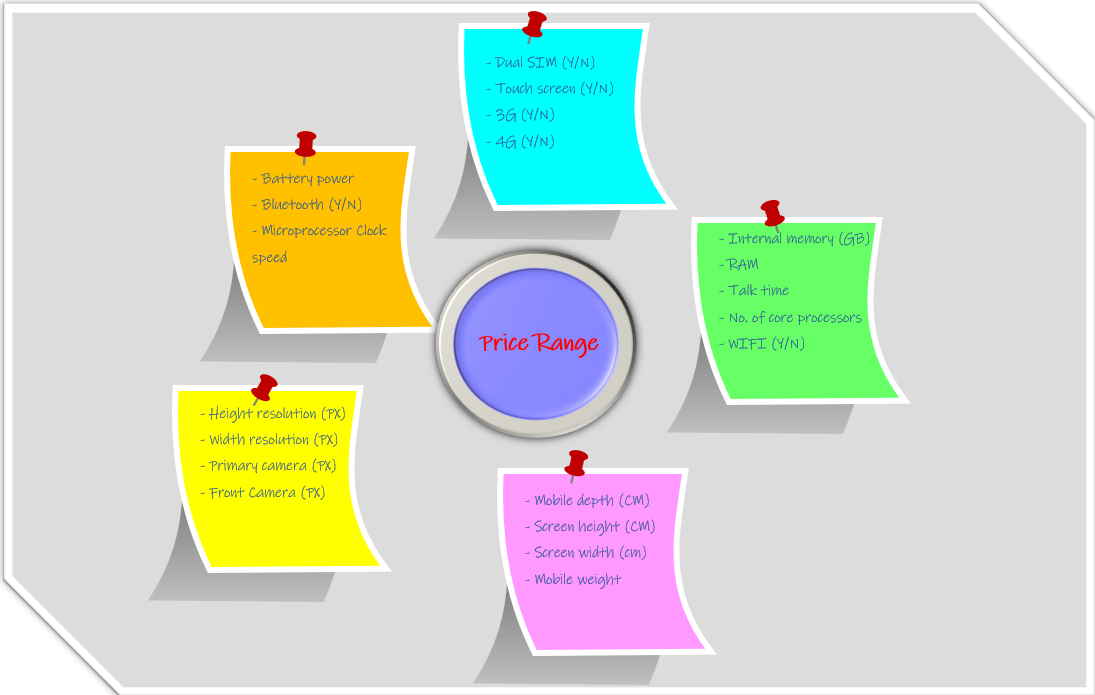

### 1.5 DataFrame Features 

The data collected from the market about mobile phone features and price range was coded as below

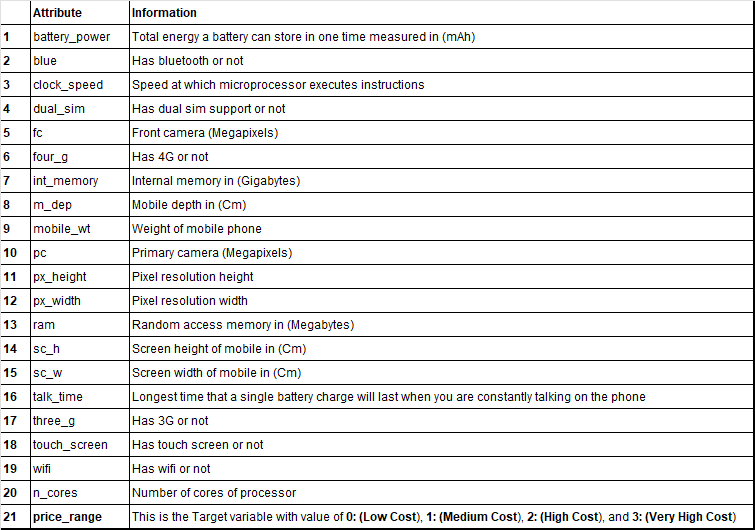

### 1.6 Libraries 

In [1]:
#Import important libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif, RFECV
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
import pickle


%matplotlib inline

## 2. The Data 

### 2.1 Load Data 

In [2]:
#Read csv into a DataFrame
df = pd.read_csv('phones.csv')

### 2.2 Understanding Data 

In [3]:
#Visualize top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Visualize bottom 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
#Establish DataFrame Shape
print(f'Data frame has { df.shape[0]} rows and { df.shape[1]} columns')

Data frame has 2000 rows and 21 columns


The dataset has 2000 records, this is sufficient for modeling

The dataset has 20 features, it is necessary to apply feature selection techniques to ensure only ideal number of features are used during training

The dataset has 1 output feature which is to be used during training and EDA

In [6]:
#Identify columns, their types and missing case
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

DataFrame columns are in numeric so Label encoding action is NOT required

Features *clock_speed* and *m_depth* have float value; an indication of entries with decimal points. Other features are integers and therefore picking integer values

In [7]:
#Establish unique for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Output Feature, _Price_range_ has 4 classes, therefore the training algorithm to be used should support multi-class classification

Features _blue_ for Bluetooth support, _dual_ for dualSIM support, _four_g_ for 4G, _three_g_ for 3G, _touch_screen_ for touchScreen support and _wifi_ for wifi support have just 2 possible values; this confirms that the *one hot encoding* process happened during data collection.

df.isnull().sum()

There is no NULL in the dataFrame so no imputation action required

In [8]:
df.duplicated().sum()

0

All cases/records are unique therefore no further action required

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Observations:
1. Each feature recorded has 2000 records
2. Generally, features have varying sizes of Min, Max and other measures. This is a confirmation that the data was collected using different scales and units of measure and/or deimensions. 
3. None of features have constant number (otherwise min=mean=25%=50%=75%=max and std=0)
4. There are a few of features with their mean close to median. This is suggests that there absence of skewness in the data in those features. Their values are likely distributed symmetrically around the central point. 

In [10]:
#Identify outliers in the data

# Calculate the IQR for each column in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_of_outliers = outliers.sum()

# Number of outliers for each variable
num_of_outliers.to_frame()


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,18
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Features *fc* for Front camera, *px_height* for Pixel height and *three_g* for 3G are the only features with outliers. Since we chose to retain those outliers, when chosing modelling algorithm, we need to be careful to use one that is least affected by outliers.

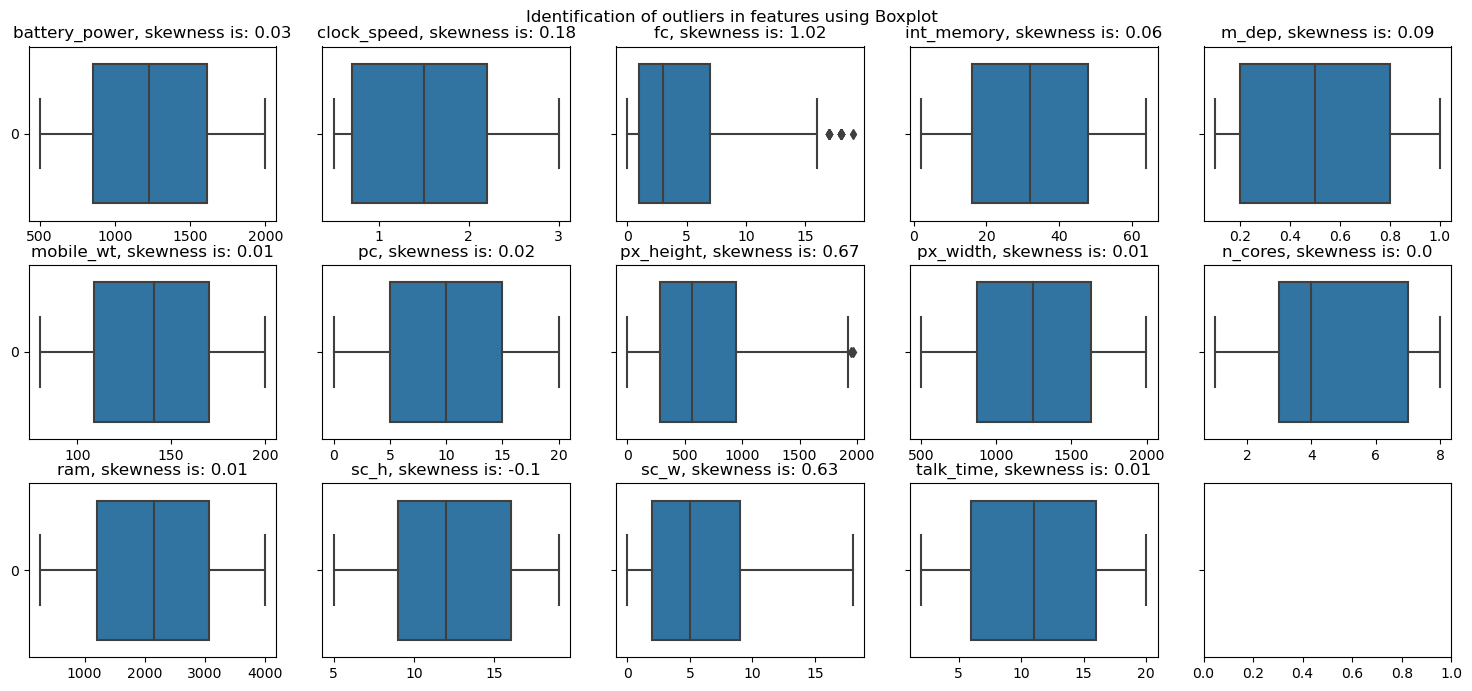

In [11]:
# Numerical and Categorical features grouped separately
num_vars = pd.DataFrame (df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 
                                       'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width',
                                       'n_cores','ram', 'sc_h', 'sc_w', 'talk_time'])
#cate_vars = pd.DataFrame (df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])


def scatter_view(dataframe, features, rows, columns, title, figure_size):
    fig, axs = plt.subplots(rows, columns, sharey=True, figsize=figure_size)
    fig.suptitle(title)
    axs=axs.flatten()
    fig.tight_layout()
    for i, field in enumerate(features):
        sns.boxplot(data = dataframe[field], orient='h', ax=axs[i])
        axs[i].set_title(field + ', skewness is: '+str(round(dataframe[field].skew(axis = 0, skipna = True), 2)))



#plot numeric features
scatter_view(dataframe=df, features=num_vars, 
             rows=3, columns=5, 
             title='Identification of outliers in features using Boxplot', 
             figure_size= (15,7) )

Front Camera megapixel, *fc* has incidence of outliers at the higher levels; Similarly Pixels height, *px_height* has higher level outliers. The rest of numeric features have phones within the acceptable levels.

### 2.3 Feature Engineering

After examining the data, no feature engineering technique is recommended since all features are in the required format

## 3. Exploratory Data Analysis, EDA 

### 3.1 Target / Output Feature 

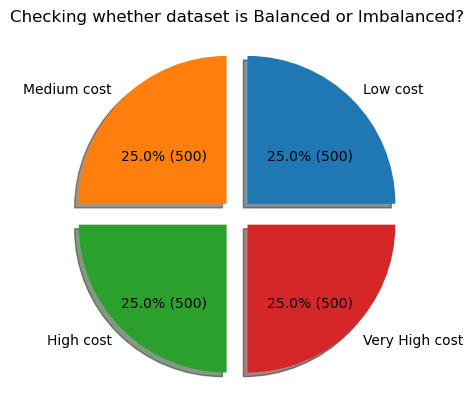

In [12]:
# Count the number of occurrences of each value in the 'price_range' column
classes = df['price_range'].value_counts()

# Define the label strings using f-strings
label = [f'{"Low" if i==0 else "Medium" if i==1 else "High" if i==2 else "Very High"} cost' for i in range(len(classes))]

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(classes.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label) #, colors=colors)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = classes[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Checking whether dataset is Balanced or Imbalanced?')

# Show the pie chart
plt.show()


1. Target feature has 4 possible classes
2. The 4 classes of target feature, *price_range* are well balanced, therefore no need to resolve for imbalance before training

### 3.2 Univariate Analysis

In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df1 = df.copy()

df1.blue.replace([0, 1], ["No", "Yes"], inplace=True)
df1.dual_sim.replace([0, 1], ["No", "Yes"], inplace=True)
df1.three_g.replace([0, 1], ["No", "Yes"], inplace=True)
df1.four_g.replace([0, 1], ["No", "Yes"], inplace=True)
df1.touch_screen.replace([0, 1], ["No", "Yes"], inplace=True)
df1.wifi.replace([0, 1], ["No", "Yes"], inplace=True)

#df1.price_range.replace([0,1,2,3], 'Low', 'Medium', 'High', 'Very High', inplace=True )
df1['price_range'].replace({0:"Low",1:"Medium",2:"High",3:"Very High"}, inplace=True)

#df1.loc[df1["blue"] == 1, "blue"] = "Yes"
#df1["blue"] = np.where(df["blue"] == 1, "No","Yes")
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium


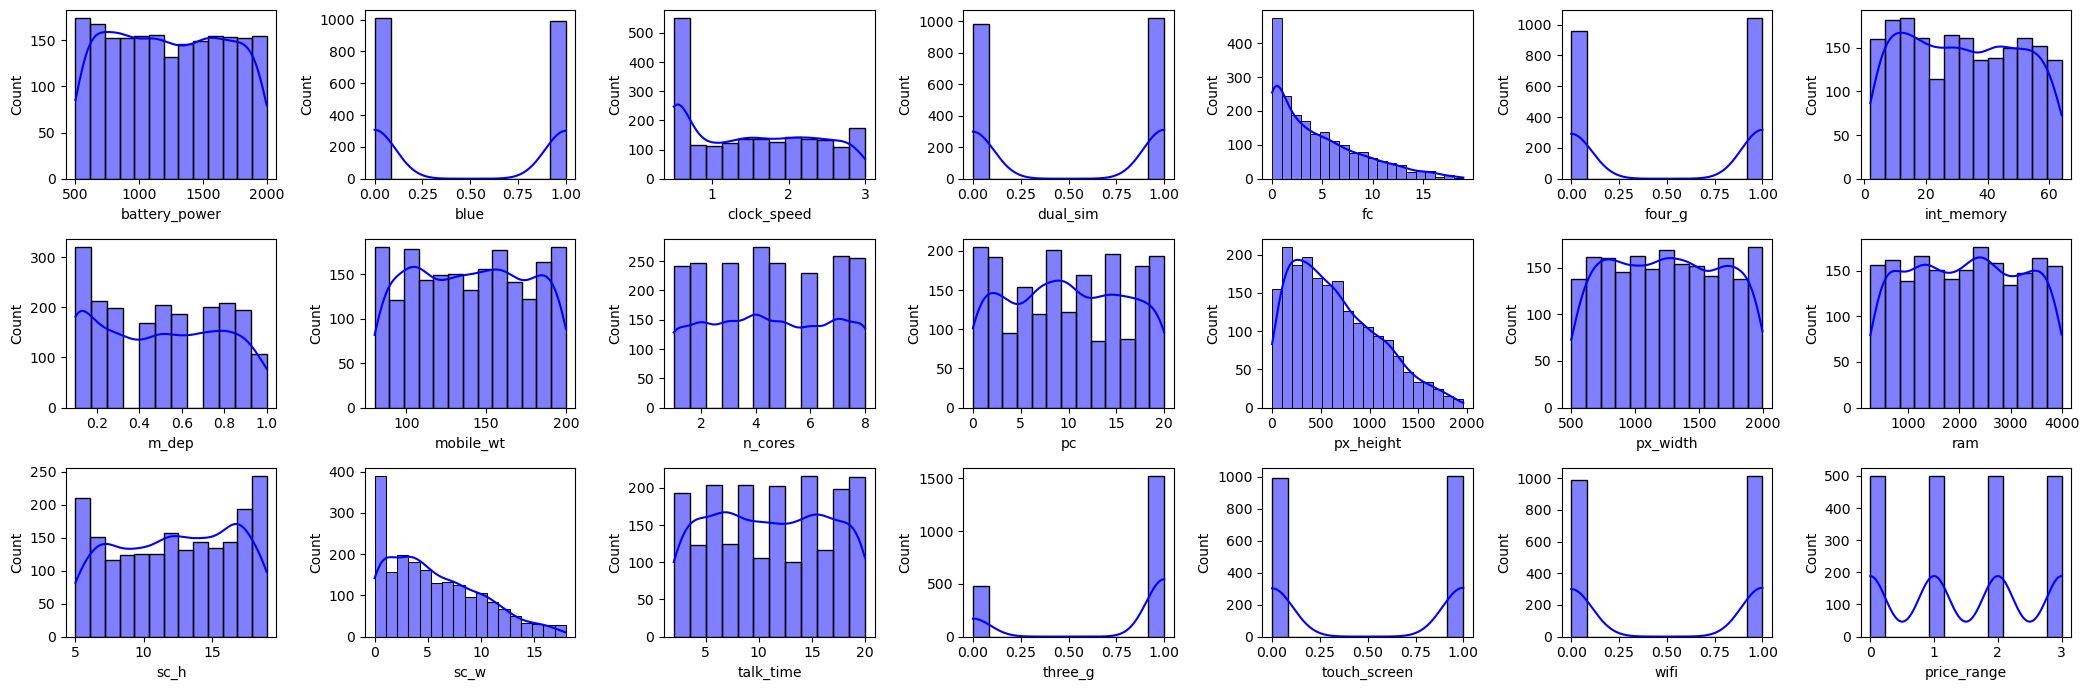

In [15]:
# Checking popularity of features in the market
    
numeric_variables = df.select_dtypes(include=['int', 'float']).columns.tolist()


#create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(21,7))
axs = axs.flatten()

#create histogram for each Numeric variable
for i, var in enumerate(numeric_variables):
    sns.histplot(data=df, x=var, kde=True, color='b', ax=axs[i])
     
# Remove any empty subplot
if len(numeric_variables)<len(axs):
    for i in range(numeric_variables, len(axs)):
        fid.delaxes(axs[i])

    
#adjust spacing between subplots
fig.tight_layout()


#show plot
plt.show()

Market Observations
1. *battery_power* - % of phones with battery power from lowest capacity (min=501 mAh) to highest capacity (max=1998 mAh) is the same. No particular capacity is higher than another.
2. Phones with *bluetooth*, *dual SIM*, *4G*, *touch screen*, and *wifi* have same share as those without
3. Phones with *lower clockspeed* are more than those with more speeds
5. Phones with lower *front camera* megapixels are more than those with higher megapixels
6. Market has phones in varying level of *internal memory* and none is a clear leader
7. The market has more phones with lower *front camera* megapixels, pixel resolution height *px_height*, *screen width* as compared to higher levels of the same features.
8. There are more *3G technology* supporting phones as compared to those supporting other technologies.

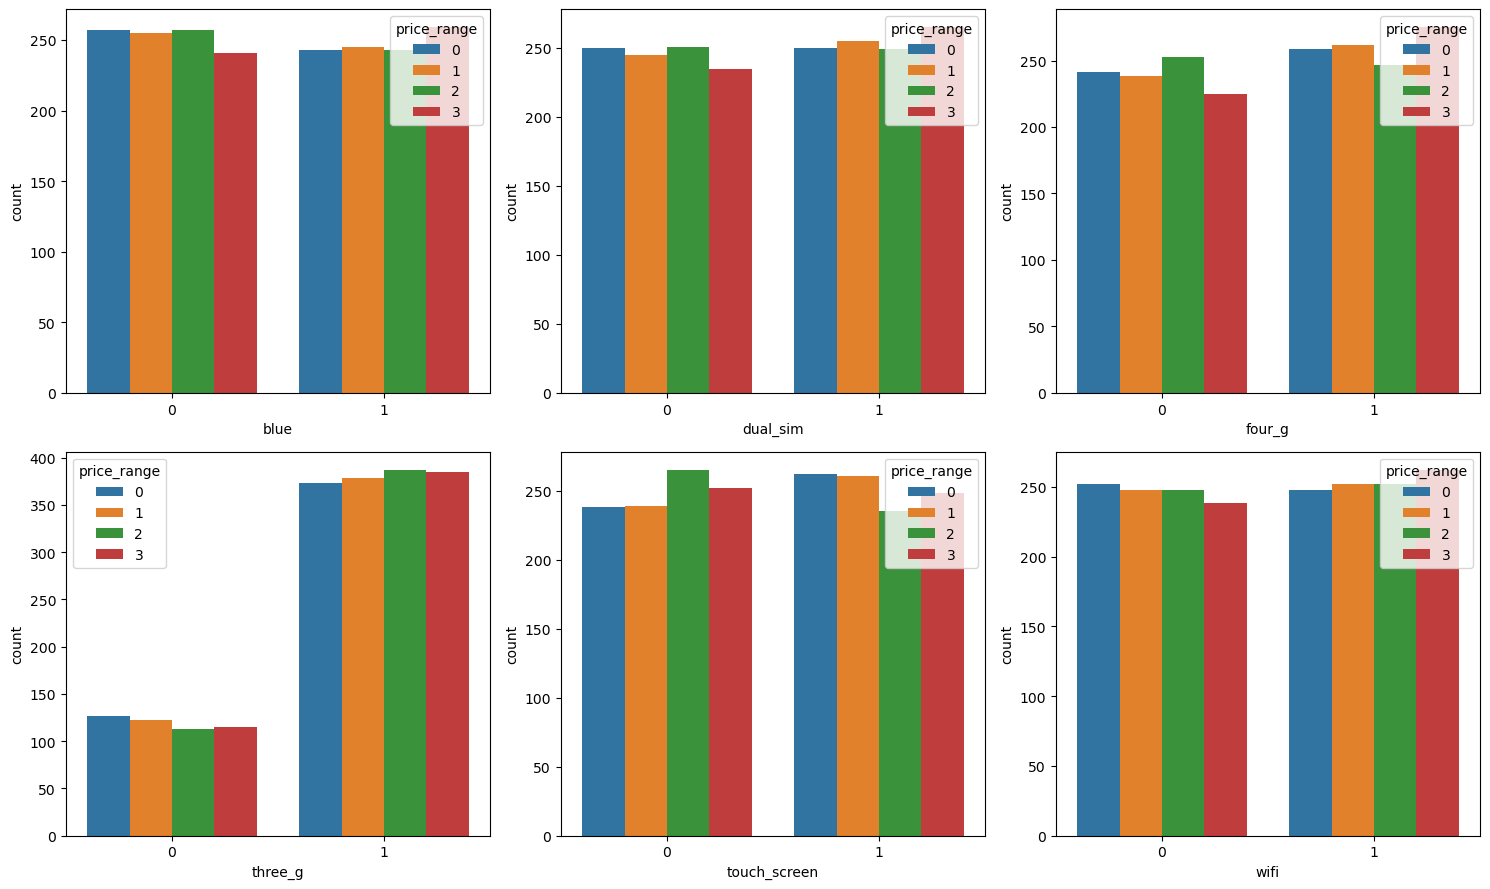

In [16]:
cat_cols = ['blue', 'dual_sim', 'four_g',
          'three_g', 'touch_screen', 'wifi']


#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,9))
axs = axs.flatten()

#create histogram for each Numeric variable
for i, var in enumerate(cat_cols):
    sns.countplot(data=df, x=var, hue='price_range', ax=axs[i])
#    sns.boxplot(x=var, y='battery_power', data=df, hue='price_range', ax=axs[i])
     

    
#adjust spacing between subplots
fig.tight_layout()


#show plot
plt.show()

Observation 
1. Phones with *blue tooth* capability tend to cost higher 
2. Phones with *dual SIM* functionality tend to cost higher
3. Phones with *3G* or *4G* technology are likely to cost higher.
4. Generally, *touch_screen* phones cost higher
5. Phones with *wifi* support costs higher

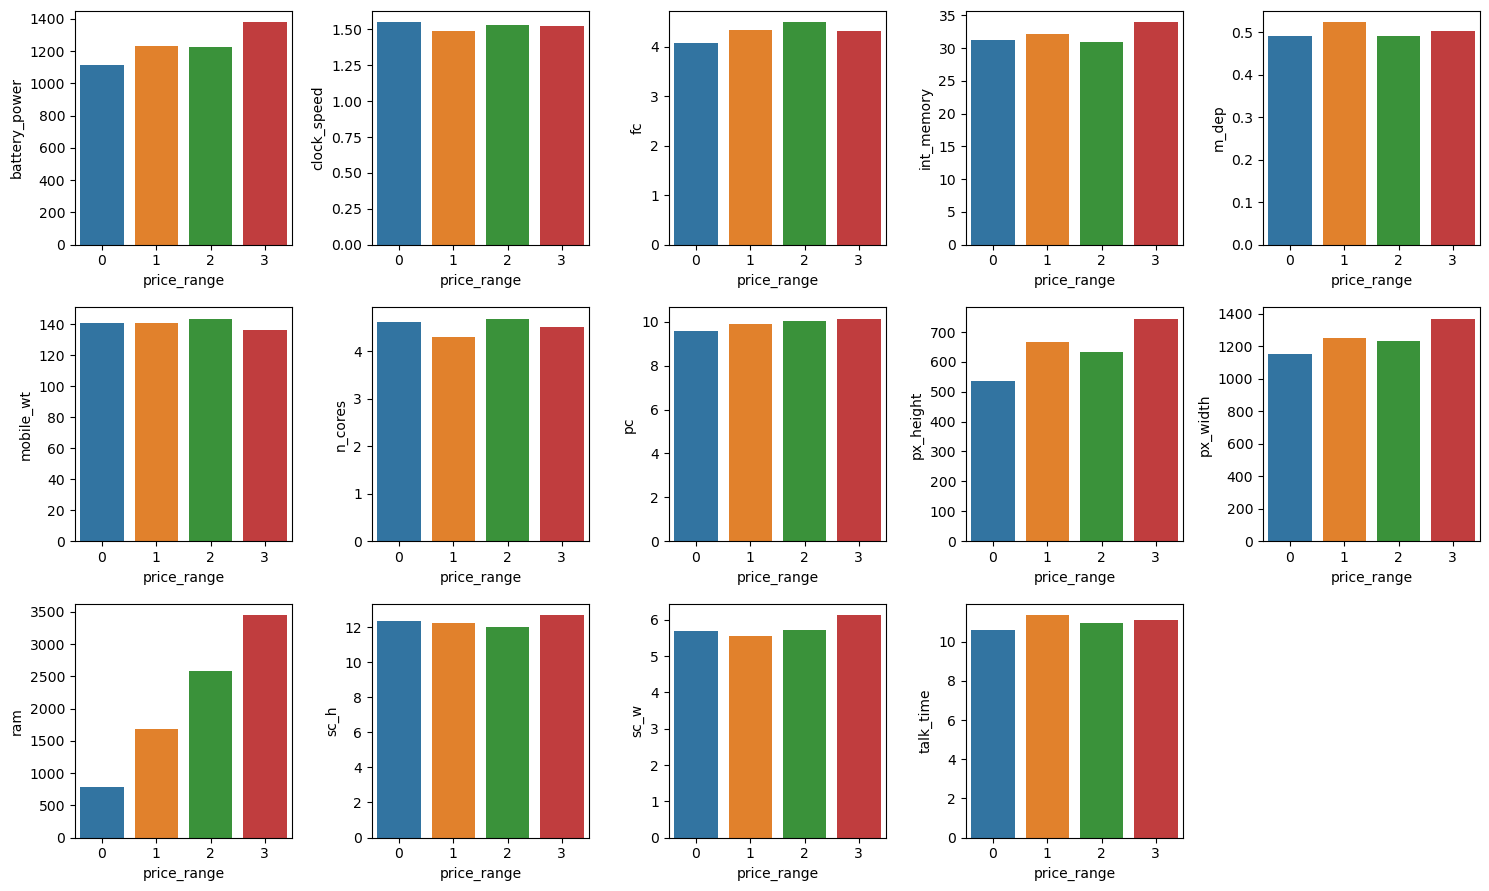

In [17]:
num_cols = df1.select_dtypes(include=['int', 'float']).columns.tolist()

#create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15,9))
axs = axs.flatten()

#barplot to get mean performance per price range
for i, var in enumerate(num_cols):
    
    viz_df = df.groupby(['price_range'], as_index=False)[var].mean().sort_values(by=var, ascending=False)
    sns.barplot(x='price_range', y=var, data=viz_df, ax=axs[i])
    
#remove extra empty subplot
if len(num_cols)<len(axs):
    for i in range(len(num_cols), len(axs)):
        fig.delaxes(axs[i])
        
#adjust spacing between subplots
fig.tight_layout()


#show plot
plt.show()

1. Increase in phone *Battery_power* power as well as *ram* results in direct increase in price range
2. Other phone features that have slight impact in cost includes *pc*, *px_height*, *px_width*, *sc_h* and *sc_w*

### 3.3 Multivariate Analysis 

#### 3.3.1 To establish how Price Range correlates with other features

<Axes: >

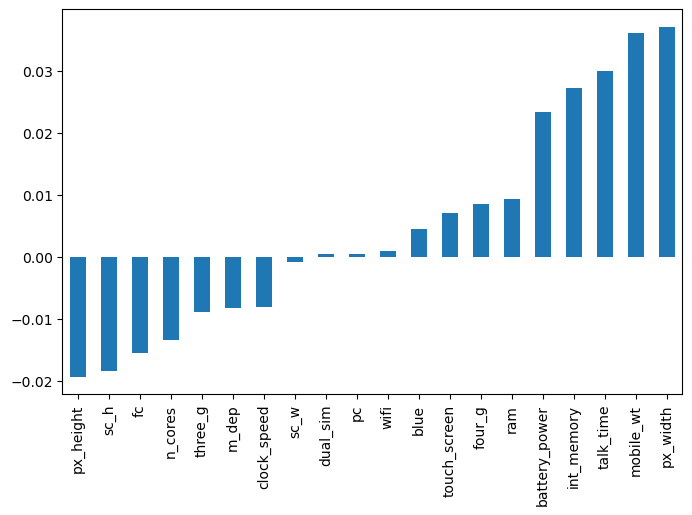

In [18]:
df2 = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']]
#Correlation Matrix
plt.figure(figsize=(8, 5))
corr = df2.apply(lambda x: pd.factorize(x)[0]).corr()
corr_df = corr['price_range'].sort_values(ascending=True)
corr_df[:-1].plot(kind='bar') #exclude price_range since it is obvious it strongly correlates with itself


#### 3.3.2 To establish how features correlates with one another

<Figure size 800x600 with 0 Axes>

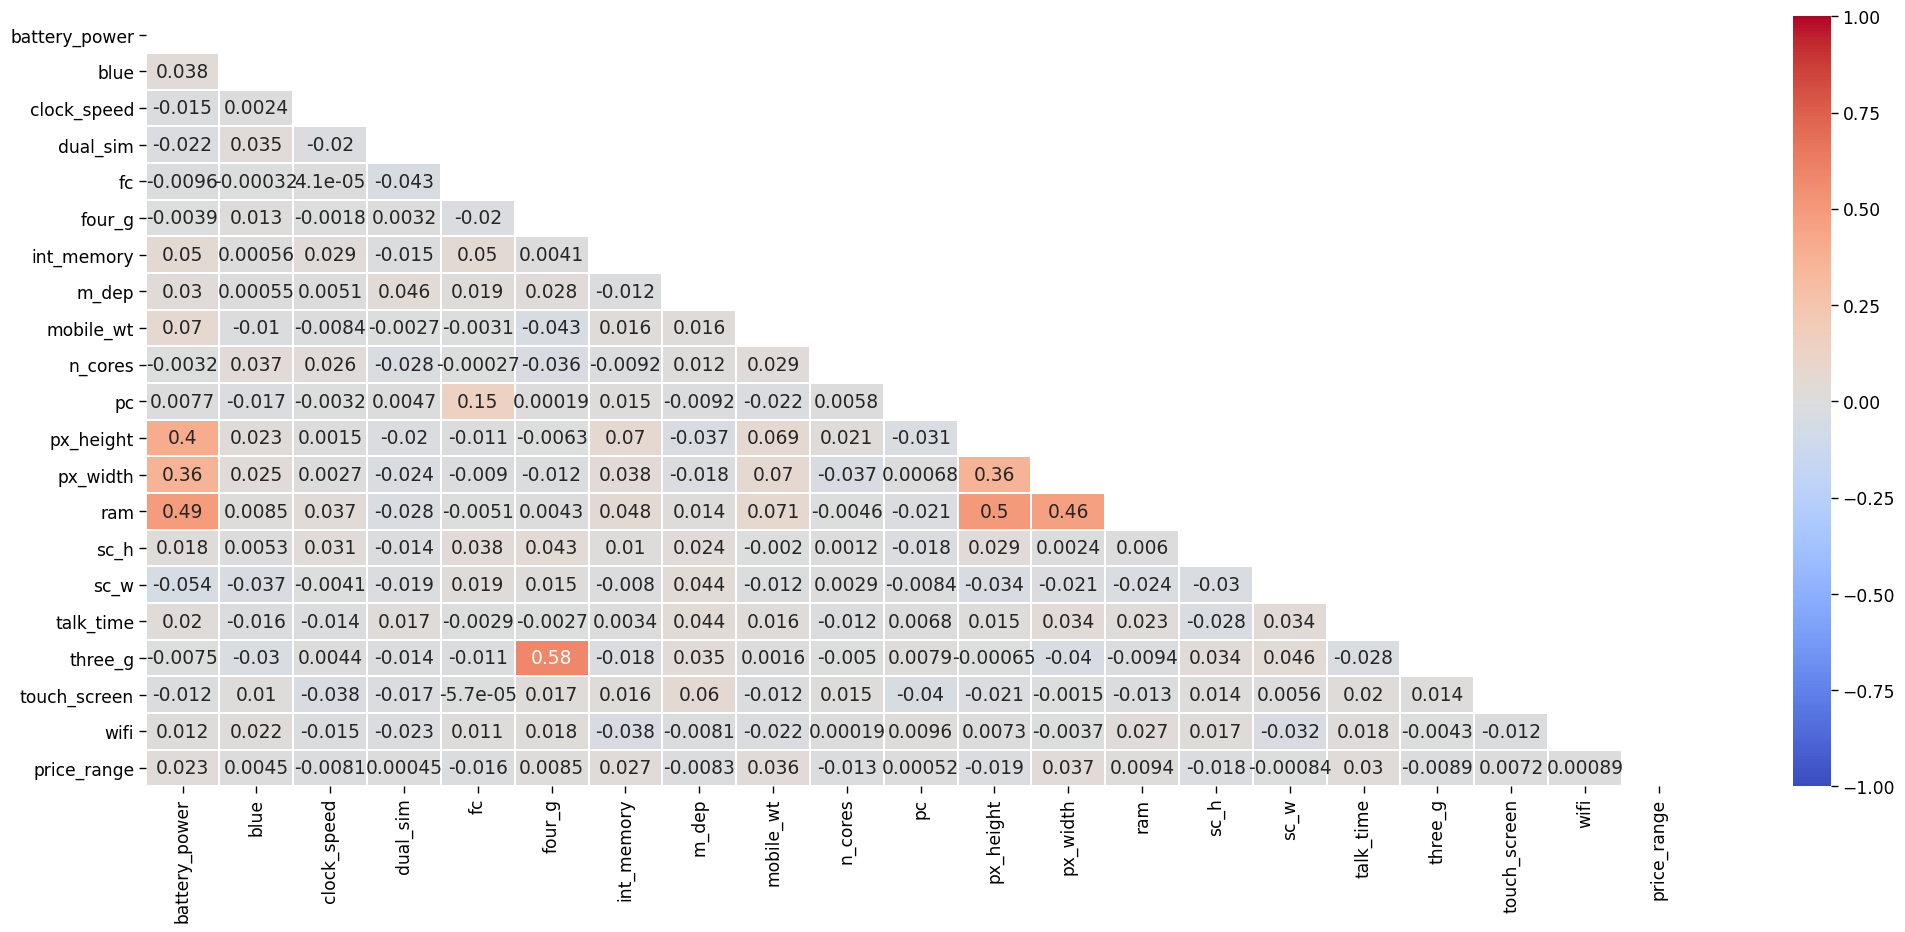

In [19]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)


#Correlation Matrix
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, 
                 yticklabels=corr.columns, annot=True, 
                 linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Observation:
1. Observed good level of correlation between below pairs of variables that we need to plot and visualize
- *battery_power* and *ram*
- *four_g* and *three_g*
- *px_height* and *ram*
- *px_width* and *ram*

#### 3.3.1 Observe relationship between pairs of features with significant correlation

<Axes: xlabel='four_g', ylabel='three_g'>

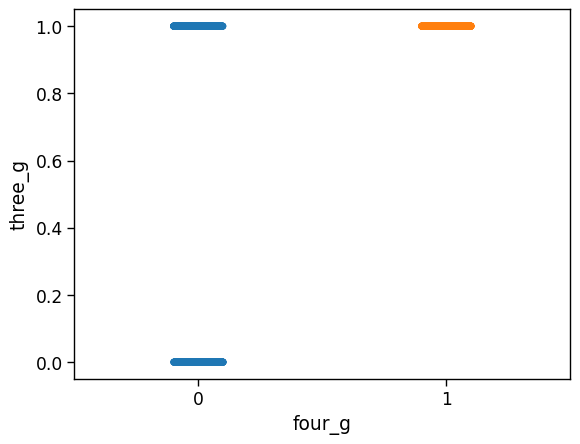

In [20]:
#Relationship between 4G and 3G
sns.stripplot(x='four_g', y='three_g', data=df)

Observations:
1. All phones with *four_g* technology also supports *three_g*

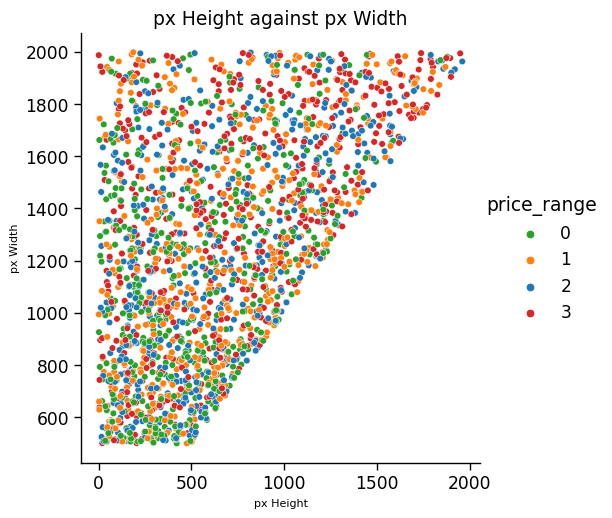

In [21]:
# set the hue palette as a dict for custom mapping
color_palette = {0: "tab:green", 1:"tab:orange", 2:"tab:blue", 3:"tab:red" }

sns.relplot(data=df, x="px_height", y="px_width", hue="price_range", palette=color_palette)
plt.xlabel('px Height', fontsize=8)
plt.ylabel('px Width', fontsize=8)
plt.title('px Height against px Width')
plt.show()

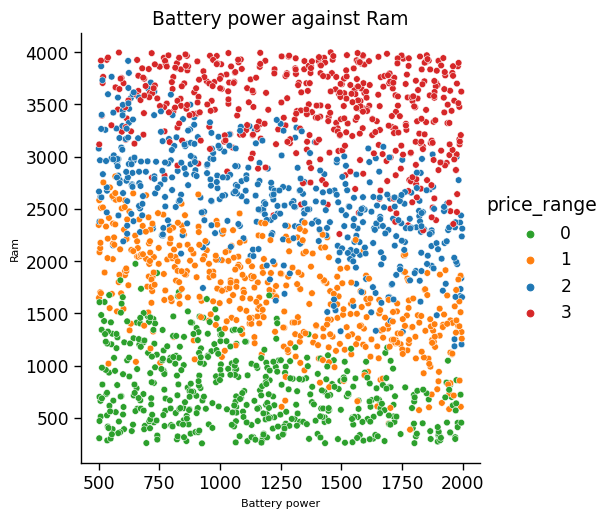

In [22]:
# set the hue palette as a dict for custom mapping
color_palette = {0: "tab:green", 1:"tab:orange", 2:"tab:blue", 3:"tab:red" }

sns.relplot(data=df, x="battery_power", y="ram", hue="price_range", palette=color_palette)
plt.xlabel('Battery power', fontsize=8)
plt.ylabel('Ram', fontsize=8)
plt.title('Battery power against Ram')
plt.show()

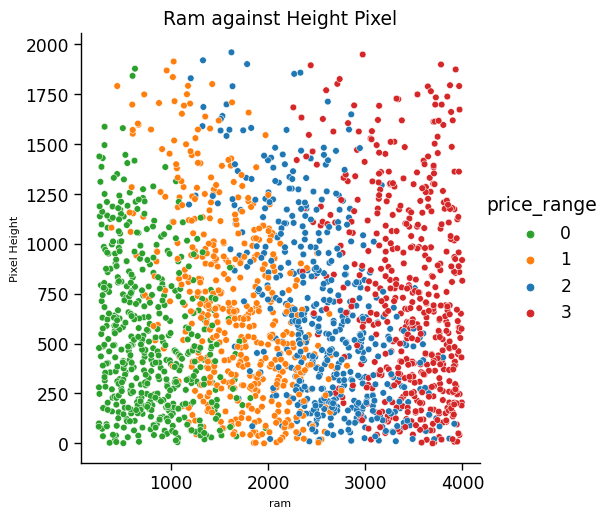

In [23]:
# set the hue palette as a dict for custom mapping
color_palette = {0: "tab:green", 1:"tab:orange", 2:"tab:blue", 3:"tab:red" }

sns.relplot(data=df, x="ram", y="px_height", hue="price_range", palette=color_palette)
plt.xlabel('ram', fontsize=8)
plt.ylabel('Pixel Height', fontsize=8)
plt.title('Ram against Height Pixel')
plt.show()

## 3. DATA TRAINING 

### 3.1 Prepare Data before Training 

In [41]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=20)

In [42]:
y_train.head()

1500    2
451     1
1627    3
669     1
1567    1
Name: price_range, dtype: int64

### 3.2 Feature Selection: Mutual Information Gain Technique 

It is of utmost importance to determin which features will add value to our Training model. 

Since I plan to use Random Forest Classifier for Training, so I will skip this process and run Feature Importance at a later stage to establish the importance of Features to classify

### 3.3 Data Training 

#### 3.3.1 Model Selection

My selection of model is informed by the following reasons:
1. Understanding that some features have outliers
2. The data contains a mix of both numerical and categorical features
3. The data contains a fairly large number of features i.e. 20 features
4. The output feature has 4-classes; so classifier must be able to work for multiclassification problem
5. As part of the output, the user wants to establish the features importance in determing price range
6. The size of data being 2000 instances isnt big enough for a large model training
7. Obviously a model good enough to generalize; giving a relatively good accuracy, precision and recall.

After considering above, I concluded tha *Random Forest Classifier* algorithm would suffice for the project

#### 3.3.2 Training and Evaluation 

In [43]:
#BASE MODEL

rfc = RandomForestClassifier() #Base model with default parameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy : {accuracy}')
print("=" * 30)
print(f'Confusion Matrix: \n {conf_matrix}')
print("=" * 60)
print(f'Classification Report: \n {class_report}')

Accuracy : 0.88
Confusion Matrix: 
 [[85  3  0  0]
 [ 5 86  7  0]
 [ 0 18 89  7]
 [ 0  0  8 92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.80      0.88      0.84        98
           2       0.86      0.78      0.82       114
           3       0.93      0.92      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.88      0.88       400



In [44]:
rfc_accs = [] #list to store accuracies for each DT
for idx, tree in enumerate(rfc.estimators_):
    score = tree.score(X_test, y_test) #find accuracy
    rfc_accs.append([idx, score]) #stores accuracy
    
rfc_accs=np.array(rfc_accs)

C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\

C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mmmutua\AppData\Local\anaconda3\Lib\

In [45]:
#sort
sorted_indices = np.argsort(rfc_accs[:,1])[::-1]

#obtain list of model ids according to sorted model accuracies
rfc_ids=rfc_accs[sorted_indices][:,0].astype(int)

In [46]:
#create numpy array, rearrange models and convert back to list
rfc.estimators_ = np.array(rfc.estimators_)[rfc_ids].tolist()

import copy

result = [] #array to store cumulative score
sc=[]
ke=[]
total_models = len(rfc.estimators_)

for k in range(1, total_models):
    #create a copy of current model
    small_model = copy.deepcopy(rfc)
    
    #det its trees to first k trees of original model
    small_model.estimators_ = rfc.estimators_[:k]
    
    #compute the score
    score = small_model.score(X_test, y_test)
    result.append([k, score])
    sc.append(score)
    ke.append(k)
    

#result
#store k=no of trees with their corresponding accuracy score new result_df
result_df = pd.DataFrame({'ks': ke, 'score': sc})

In [47]:
max_accuracy_score_point = result_df. loc[result_df['score']. idxmax()][0]
print(f'K bearing maximum value of accuracy score is {max_accuracy_score_point}')

K bearing maximum value of accuracy score is 82.0


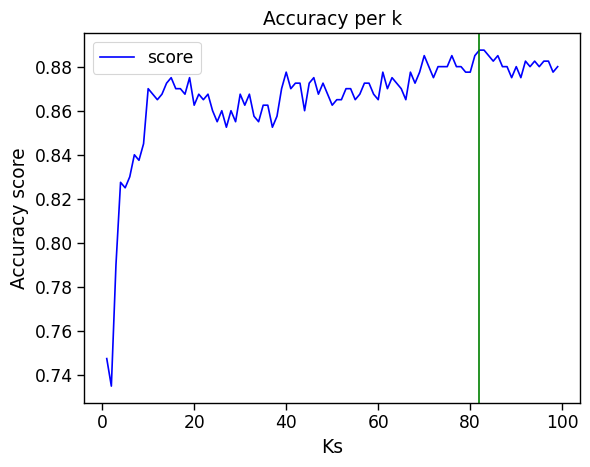

In [48]:
#Plot Accuracy score vs DTs
result_df.plot(kind='line', x='ks', y='score', color='blue')
plt.axvline(x = max_accuracy_score_point, color = 'g', label = 'Max accuracy score point')
plt.xlabel('Ks')
plt.ylabel('Accuracy score')
plt.title('Accuracy per k')
plt.show()


In [49]:
small_model.fit(X_train, y_train)
y_pred = small_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy : {accuracy}')
print("=" * 30)
print(f'Confusion Matrix: \n {conf_matrix}')
print("=" * 60)
print(f'Classification Report: \n {class_report}')


Accuracy : 0.8525
Confusion Matrix: 
 [[83  5  0  0]
 [ 9 81  8  0]
 [ 0 19 87  8]
 [ 0  0 10 90]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.77      0.83      0.80        98
           2       0.83      0.76      0.79       114
           3       0.92      0.90      0.91       100

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.85      0.85      0.85       400



#### 3.3.3 Hyperparameter Tuning, Training and Evaluation

In [50]:
#TUNED MODEL
params = {
    'n_estimators': [75, 100, 125, max_accuracy_score_point],
    'max_features': ['auto','sqrt', 'log2', None],
    
}


grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid=params, cv=5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

RandomForestClassifier(max_features=None, n_estimators=75)


In [51]:
rfc_tuned = grid_search.best_estimator_
rfc_tuned.fit(X_train, y_train)
y_pred = rfc_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy : {accuracy}')
print("=" * 30)
print(f'Confusion Matrix: \n {conf_matrix}')
print("=" * 60)
print(f'Classification Report: \n {class_report}')


Accuracy : 0.87
Confusion Matrix: 
 [[80  8  0  0]
 [ 9 84  5  0]
 [ 0 11 97  6]
 [ 0  0 13 87]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        88
           1       0.82      0.86      0.84        98
           2       0.84      0.85      0.85       114
           3       0.94      0.87      0.90       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



#### 3.4. Test a known value

In [52]:
#Let us see whether our model would accurately predicts right PRICE_RANGE for row 201
row=201
df.iloc[row,:] #first let us observe values associated with index 201

battery_power    1445.0
blue                1.0
clock_speed         2.4
dual_sim            1.0
fc                  7.0
four_g              1.0
int_memory         20.0
m_dep               0.4
mobile_wt         173.0
n_cores             7.0
pc                 15.0
px_height        1273.0
px_width         1345.0
ram              1441.0
sc_h                7.0
sc_w                4.0
talk_time          13.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.0
Name: 201, dtype: float64

In [53]:
#Get values of a random case in the file
df_row_values = df.iloc[row,:-1].values
df_row_predicted_values = rfc_tuned.predict([df_row_values])
print(f'Predicted price Range for feature values related to row {row} is {df_row_predicted_values}')

Predicted price Range for feature values related to row 201 is [1]


C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### 3.3.5 Feature Importance Determination 

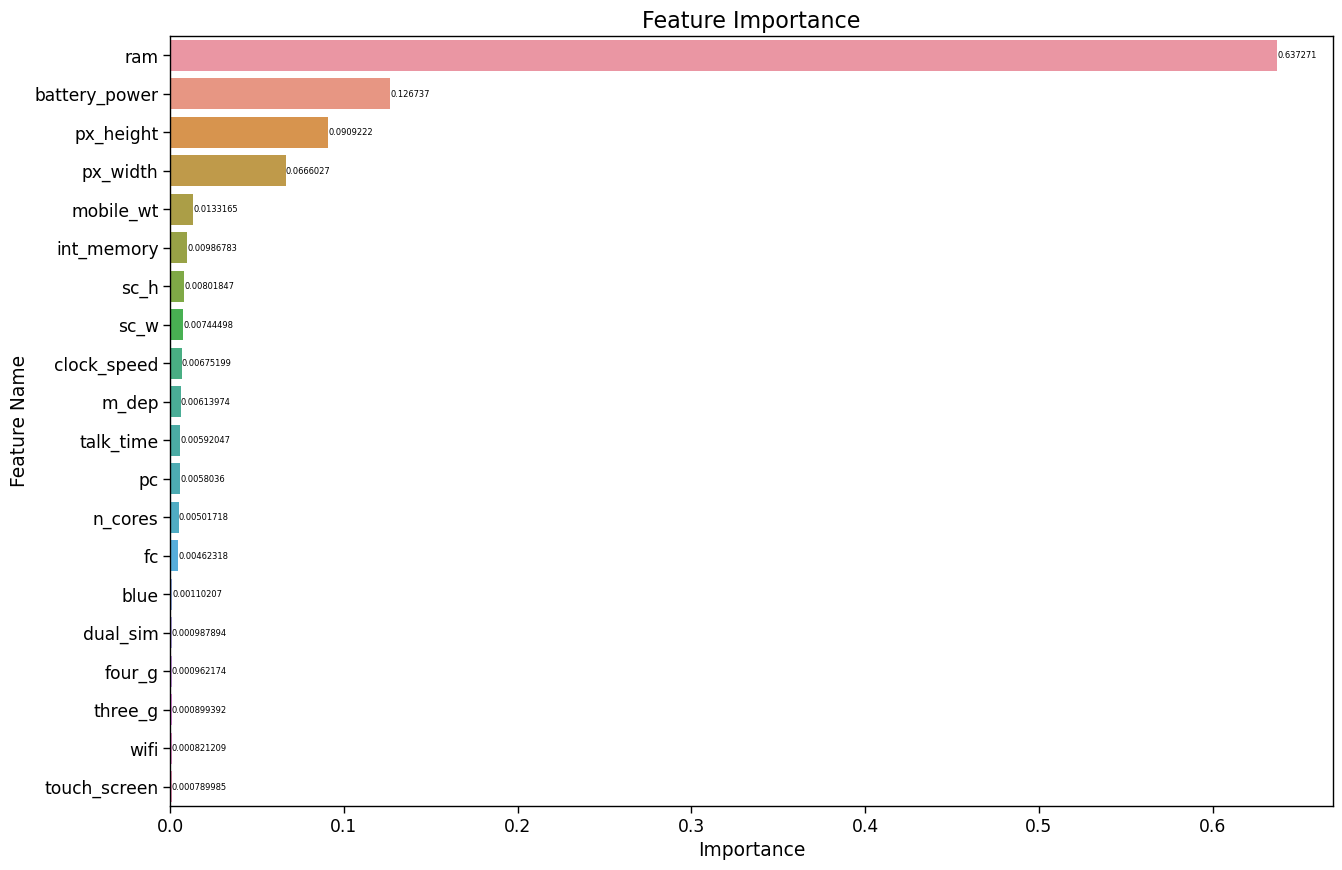

In [54]:
importance_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': rfc_tuned.feature_importances_
})

fi = importance_df.sort_values(by='Importance',ascending=False)
                               
plt.figure(figsize = (15,10))
ax = sns.barplot(data = fi, x = 'Importance', y='Feature Name')
plt.title('Feature Importance',  fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
ax.bar_label(ax.containers[0], fontsize=6)


plt.show()

Observation:
1. Six (6) features are less important in determining the *Price Range*. These are *dual_sim*, *blue*, *four_g*, *three_g*, *touch_screen* and *wifi*
2. The main reason they dont determine price range is because they are generally & universally present in significant number of mobile phones.

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

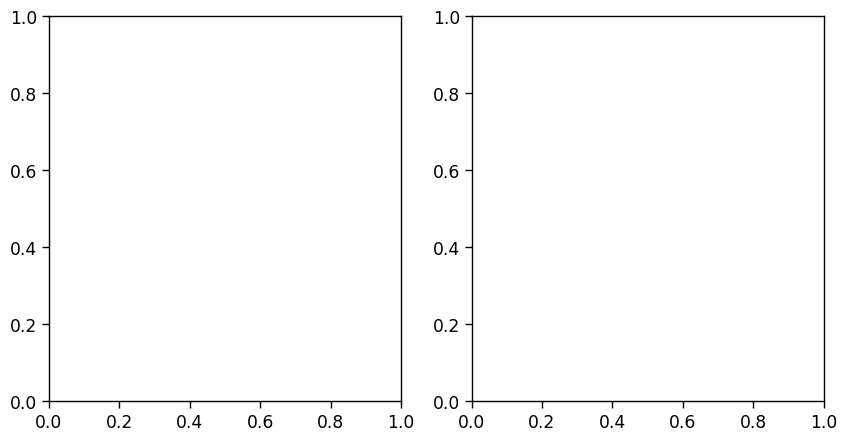

In [55]:
# Instantiate for feature names and class names
features = X.columns
classes = ["0", "1", "2", "3"]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

# Loop over the four estimators and plot the decision trees
for index in range(0, 2): # for example (2 Estimators)
   # tree.plot_tree(rfc_tuned.estimators_[index], feature_names = features, class_names=classes, filled = True, ax = axes[index]);
    tree.plot_tree(rfc_tuned.estimators_[index],  class_names=classes, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 8)
    
# Add overall title to the figure
fig.suptitle("Decision Trees of Random Forest Estimators", fontsize=14)
plt.show()

#### 3.3.6 Visualizing Output in transformed dimensions

#### 3.3.6.1 Principal Component Analysis, PCA

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Fit Random Forest Classifier on reduced data
rfc_tuned.fit(X_pca, y)

y_numpy=y.to_numpy() #converting y_train to numpy array to match dimension of X_train_pca

#plot decision boundaries in 2D PCA space
plot_decision_regions(X_pca, y_numpy, clf=rfc_tuned, legend=2)
plt.xlabel('PCA Principal component 1', fontsize=12)
plt.ylabel('PCA principal component 2', fontsize=12)
plt.title('Decision Boundary of Random Forest Classifier using PCA')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Mobile Data Price Range",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component")
fig.show()

##### 3.3.6.2 t-distributed stochastic neighbor embedding, t-SNE

In [ ]:
#Reduce dimensionality to 2D using t-SNE
t_SNE = TSNE(n_components=2, learning_rate='auto', 
             init='pca', perplexity=20)
X_t_SNE = t_SNE.fit_transform(X)

#Fit Random Forest Classifier on reduced data
rfc_tuned.fit(X_t_SNE, y)

#converting y_train to numpy array to match dimension of X_train_t_SNE
y_numpy=y.to_numpy() 

#plot decision boundaries in 2D t-SNE space
plot_decision_regions(X_t_SNE, y_numpy, clf=rfc_tuned, legend=2)
plt.xlabel('t-SNE Principal component 1', fontsize=8)
plt.ylabel('t-SNE principal component 2', fontsize=8)
plt.title('Decision Boundary of Random Forest Classifier using t-SNE', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


In [ ]:
fig = px.scatter(x=X_t_SNE[:, 0], y=X_t_SNE[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Mobile Price Range",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE")
fig.show()

#### 3.3.7 Saving the Model

In [ ]:
# save the model to object

with open('model_pickle.pkl','wb') as f:
    pickle.dump(rfc_tuned,f)
